In [66]:
cd '/content/drive/My Drive/Colab Notebooks/matrix_two/dw_matrix/car_signs'


/content/drive/My Drive/Colab Notebooks/matrix_two/dw_matrix/car_signs


In [67]:
import pandas as pd
import numpy as np
import os
import datetime

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from tensorflow.keras.utils import to_categorical

%load_ext tensorboard

import matplotlib.pyplot as plt
from skimage import color, exposure

from sklearn.metrics import accuracy_score

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [0]:
train = pd.read_pickle('data/train.p')
test = pd.read_pickle('data/test.p')

X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']

In [0]:
if y_train.ndim == 1: y_train = to_categorical(y_train)
if y_test.ndim == 1: y_test = to_categorical(y_test)

In [0]:
input_shape = X_train.shape[1:]
num_classes = y_train.shape[1]

In [71]:
model = Sequential([
  Conv2D(filters=64, kernel_size=(3,3), activation='relu', input_shape=input_shape),

  Flatten(),

  Dense(num_classes, activation='softmax'),

])

# model.summary()

model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])
model.fit(X_train, y_train)

1088/1088 [==============================] - 3s 3ms/step - loss: 8.6945 - accuracy: 0.7743


In [0]:
def get_cnn_v1(input_shape, num_classes):
  return Sequential([
    Conv2D(filters=64, kernel_size=(3,3), activation='relu', input_shape=input_shape),

    Flatten(),

    Dense(num_classes, activation='softmax'),

])

# model.summary()

def train_model(model, X_train, y_train, params_fit={}):
  model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

  logdir = os.path.join('logs', datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
  tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)

  model.fit(
      X_train, 
      y_train,
      batch_size=params_fit.get('batch_size', 128),
      epochs=params_fit.get('epochs', 5),
      verbose=params_fit.get('verbose', 1),
      validation_data=params_fit.get('validation_data', (X_train, y_train)),
      callbacks= [tensorboard_callback]
      )
  return model

In [73]:
model = get_cnn_v1(input_shape, num_classes)
model_trained = train_model(model, X_train, y_train)

Epoch 1/5
272/272 [==============================] - 3s 9ms/step - loss: 42.4845 - accuracy: 0.7359 - val_loss: 0.2221 - val_accuracy: 0.9492
Epoch 2/5
272/272 [==============================] - 2s 8ms/step - loss: 0.2129 - accuracy: 0.9530 - val_loss: 0.1378 - val_accuracy: 0.9646
Epoch 3/5
272/272 [==============================] - 2s 9ms/step - loss: 0.1419 - accuracy: 0.9672 - val_loss: 0.0827 - val_accuracy: 0.9796
Epoch 4/5
272/272 [==============================] - 2s 9ms/step - loss: 0.1107 - accuracy: 0.9745 - val_loss: 0.0598 - val_accuracy: 0.9862
Epoch 5/5
272/272 [==============================] - 2s 9ms/step - loss: 0.0968 - accuracy: 0.9764 - val_loss: 0.0694 - val_accuracy: 0.9841


In [0]:
def predict(model_trained, X_test, y_test, scoring=accuracy_score):

  y_test_norm = np.argmax(y_test, axis=1)

  y_pred_prob = model_trained.predict(X_test)
  y_pred = np.argmax(y_pred_prob, axis=1)

  return scoring(y_test_norm, y_pred)

In [83]:
predict(model_trained, X_test, y_test)

0.836281179138322

In [0]:
def train_and_predict(model):
  model_trained = train_model(model, X_train, y_train)

  return predict(model_trained, X_test, y_test)

In [91]:
def get_cnn_v2(input_shape, num_classes):
  return Sequential([
    Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=input_shape),
    MaxPool2D(),
    Dropout(0.3),


    Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    MaxPool2D(),
    Dropout(0.3),

    Flatten(),

    Dense(1024, activation='relu'),
    Dropout(0.3),

    Dense(num_classes, activation='softmax'),

])
  
train_and_predict(get_cnn_v2(input_shape, num_classes))


Epoch 1/5
272/272 [==============================] - 3s 9ms/step - loss: 4.6507 - accuracy: 0.3391 - val_loss: 0.8628 - val_accuracy: 0.8034
Epoch 2/5
272/272 [==============================] - 2s 9ms/step - loss: 0.8585 - accuracy: 0.7526 - val_loss: 0.2606 - val_accuracy: 0.9468
Epoch 3/5
272/272 [==============================] - 2s 9ms/step - loss: 0.4479 - accuracy: 0.8695 - val_loss: 0.1169 - val_accuracy: 0.9738
Epoch 4/5
272/272 [==============================] - 2s 9ms/step - loss: 0.3072 - accuracy: 0.9103 - val_loss: 0.0758 - val_accuracy: 0.9827
Epoch 5/5
272/272 [==============================] - 2s 9ms/step - loss: 0.2313 - accuracy: 0.9324 - val_loss: 0.0742 - val_accuracy: 0.9864


0.9154195011337869

In [92]:
def get_cnn_v3(input_shape, num_classes):
  return Sequential([
    Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=input_shape),
    Conv2D(filters=32, kernel_size=(3,3), activation='relu'),
    MaxPool2D(),
    Dropout(0.3),


    Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    MaxPool2D(),
    Dropout(0.3),

    Flatten(),

    Dense(1024, activation='relu'),
    Dropout(0.3),

    Dense(num_classes, activation='softmax'),

])
  
train_and_predict(get_cnn_v3(input_shape, num_classes))


Epoch 1/5
272/272 [==============================] - 3s 12ms/step - loss: 2.2287 - accuracy: 0.5268 - val_loss: 0.3093 - val_accuracy: 0.9318
Epoch 2/5
272/272 [==============================] - 3s 11ms/step - loss: 0.4428 - accuracy: 0.8720 - val_loss: 0.0968 - val_accuracy: 0.9754
Epoch 3/5
272/272 [==============================] - 3s 11ms/step - loss: 0.2442 - accuracy: 0.9289 - val_loss: 0.0538 - val_accuracy: 0.9889
Epoch 4/5
272/272 [==============================] - 3s 11ms/step - loss: 0.1699 - accuracy: 0.9507 - val_loss: 0.0286 - val_accuracy: 0.9938
Epoch 5/5
272/272 [==============================] - 3s 11ms/step - loss: 0.1306 - accuracy: 0.9622 - val_loss: 0.0271 - val_accuracy: 0.9934


0.9684807256235828

In [98]:
def get_cnn_v4(input_shape, num_classes):
  return Sequential([
    Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=input_shape),
    Conv2D(filters=32, kernel_size=(3,3), activation='relu',padding='same'),
    MaxPool2D(),
    Dropout(0.3),


    Conv2D(filters=64, kernel_size=(3,3), activation='relu',padding='same'),
    Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    MaxPool2D(),
    Dropout(0.3),

    Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same'),
    Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    MaxPool2D(),
    Dropout(0.3),

    Flatten(),

    Dense(1024, activation='relu'),
    Dropout(0.3),

    Dense(num_classes, activation='softmax'),

])
train_and_predict(get_cnn_v4(input_shape,num_classes))


Epoch 1/5
272/272 [==============================] - 4s 14ms/step - loss: 2.2611 - accuracy: 0.3884 - val_loss: 0.5705 - val_accuracy: 0.8509
Epoch 2/5
272/272 [==============================] - 3s 13ms/step - loss: 0.6128 - accuracy: 0.8127 - val_loss: 0.1501 - val_accuracy: 0.9621
Epoch 3/5
272/272 [==============================] - 3s 12ms/step - loss: 0.3159 - accuracy: 0.9037 - val_loss: 0.0707 - val_accuracy: 0.9828
Epoch 4/5
272/272 [==============================] - 3s 12ms/step - loss: 0.2217 - accuracy: 0.9343 - val_loss: 0.0463 - val_accuracy: 0.9873
Epoch 5/5
272/272 [==============================] - 3s 12ms/step - loss: 0.1705 - accuracy: 0.9504 - val_loss: 0.0398 - val_accuracy: 0.9898


0.9678004535147392

In [99]:
def get_cnn_v5(input_shape, num_classes):
  return Sequential([
    Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=input_shape),
    Conv2D(filters=32, kernel_size=(3,3), activation='relu',padding='same'),
    MaxPool2D(),
    Dropout(0.3),


    Conv2D(filters=64, kernel_size=(3,3), activation='relu',padding='same'),
    Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    MaxPool2D(),
    Dropout(0.3),

    Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same'),
    Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    MaxPool2D(),
    Dropout(0.3),

    Flatten(),

    Dense(1024, activation='relu'),
    Dropout(0.3),

    Dense(1024, activation='relu'),
    Dropout(0.3),

    Dense(num_classes, activation='softmax'),

])
train_and_predict(get_cnn_v5(input_shape,num_classes))

Epoch 1/5
272/272 [==============================] - 4s 14ms/step - loss: 2.5260 - accuracy: 0.2975 - val_loss: 0.9505 - val_accuracy: 0.7000
Epoch 2/5
272/272 [==============================] - 4s 13ms/step - loss: 0.7654 - accuracy: 0.7580 - val_loss: 0.1788 - val_accuracy: 0.9492
Epoch 3/5
272/272 [==============================] - 4s 13ms/step - loss: 0.3619 - accuracy: 0.8872 - val_loss: 0.0806 - val_accuracy: 0.9756
Epoch 4/5
272/272 [==============================] - 4s 13ms/step - loss: 0.2347 - accuracy: 0.9274 - val_loss: 0.0480 - val_accuracy: 0.9856
Epoch 5/5
272/272 [==============================] - 4s 13ms/step - loss: 0.1929 - accuracy: 0.9421 - val_loss: 0.0390 - val_accuracy: 0.9892


0.9673469387755103

In [101]:
X_train[0].shape

(32, 32, 3)

In [0]:
X_train_gray = color.rgb2gray(X_train).reshape(-1,32,32,1)
X_test_gray = color.rgb2gray(X_test).reshape(-1,32,32,1)


In [121]:
model = get_cnn_v5((32,32,1), num_classes)
model_trained = train_model(model, X_train_gray, y_train, params_fit={})
predict(model_trained, X_test_gray, y_test)

Epoch 1/5
272/272 [==============================] - 4s 14ms/step - loss: 2.3885 - accuracy: 0.3184 - val_loss: 0.7167 - val_accuracy: 0.7834
Epoch 2/5
272/272 [==============================] - 4s 13ms/step - loss: 0.5500 - accuracy: 0.8211 - val_loss: 0.1336 - val_accuracy: 0.9631
Epoch 3/5
272/272 [==============================] - 4s 13ms/step - loss: 0.2502 - accuracy: 0.9210 - val_loss: 0.0641 - val_accuracy: 0.9827
Epoch 4/5
272/272 [==============================] - 4s 13ms/step - loss: 0.1573 - accuracy: 0.9505 - val_loss: 0.0356 - val_accuracy: 0.9886
Epoch 5/5
272/272 [==============================] - 4s 13ms/step - loss: 0.1219 - accuracy: 0.9616 - val_loss: 0.0212 - val_accuracy: 0.9947


0.9596371882086168

ERROR! Session/line number was not unique in database. History logging moved to new session 62


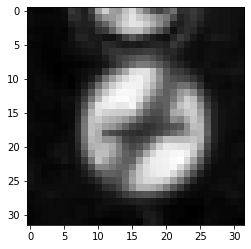

In [107]:
plt.imshow(color.rgb2gray(X_train[0]), cmap=plt.get_cmap('gray'))

In [0]:
def preproc_img(img):
  hsv = color.rgb2hsv(img)
  hsv[:,:,2] = exposure.equalize_adapthist(hsv[:,:,2])
  img = color.hsv2rgb(hsv)

  return img

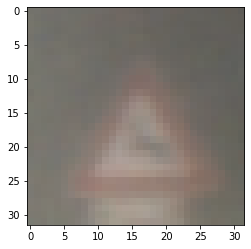

In [124]:
plt.imshow( X_train[400] )

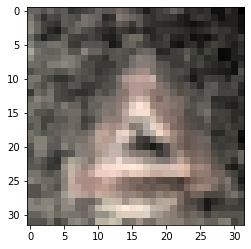

In [123]:
plt.imshow( preproc_img(X_train[400]) )

In [127]:
# X_train_prp = X_train.copy().astype(np.float32)
# X_test_prp = X_test.copy().astype(np.float32)

# for i in tqdm(range(X_train.shape[0])):
  # X_train_prp[i] = preproc_img(X_train[i])

NameError: ignored

In [77]:
y_pred_prob[400]

array([1.22620055e-04, 3.03428445e-04, 2.25704334e-05, 1.36358524e-08,
       9.97245789e-01, 2.15082290e-03, 4.06362834e-12, 2.25634622e-16,
       1.60506744e-07, 6.65184158e-11, 6.34951952e-11, 6.58957004e-12,
       8.07233450e-17, 1.73782027e-07, 3.77484155e-21, 9.05360412e-06,
       9.95248047e-06, 4.32742940e-22, 1.25337960e-11, 7.94798836e-28,
       1.29708910e-18, 3.67809446e-15, 7.40180942e-22, 5.76202421e-16,
       1.53475709e-21, 3.31828572e-21, 2.05627505e-18, 1.09714886e-25,
       1.35433584e-04, 5.46186001e-20, 6.65593444e-28, 1.12500426e-14,
       4.43351640e-11, 1.67756942e-14, 1.37124015e-23, 5.64275985e-15,
       2.59663317e-23, 1.65369054e-23, 6.51146775e-24, 1.75882002e-24,
       1.52292949e-14, 9.00293039e-18, 2.72220475e-22], dtype=float32)

In [0]:
df = pd.read_csv('data/signnames.csv')
labels_dict = df.to_dict()['b']


In [79]:
labels_dict[np.argmax(y_pred_prob[400])]

'Speed limit (70km/h)'

<BarContainer object of 43 artists>

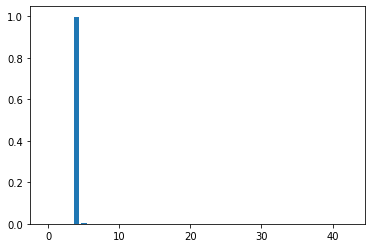

In [80]:
plt.bar(range(43), y_pred_prob[400])

In [0]:
# %tensorboard --logdir logs